In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats



import seaborn as sns
import statsmodels.api as sm
import pandas as pd



from scipy.stats import shapiro,normaltest,kstest,jarque_bera
import pingouin as pg
from pingouin import kruskal

In [2]:
def ubah_notasi_ilmiah(value):
    formatted_value = "{:.4f}".format(value) if isinstance(value, float) else value
    return formatted_value

def anova_t_tidak_normal_num(xx,yy,full_data,p_vall):
    panjang_x=len(yy.columns)
    dataaaa=[]

    
    dat=full_data[xx].describe().iloc[1]
    #print(dat)
    for i in range(panjang_x):

        
        
        #print('\n\n')
        if dat<2:
              print(dat,full_data[xx],'data mono')
                
                
                
        if dat ==2:
            #print(dat,xx.columns[i],'t')
            #print(full_data[[yy,xx.columns[i]]].head())
            data_s=full_data[xx]
            #print(data_s.unique())
            #print(data_s)
            unique_values = data_s.unique()
            #print([unique_values[0]])

            data_s_1=full_data[full_data[xx]==unique_values[0]][num.columns[i]]
            #print(data_s_1)
            data_s_2=full_data[full_data[xx]==unique_values[1]][num.columns[i]]
            #print(data_s_2)
            #print(len(data_s_1),len(data_s_2))


            ## now for the test

            t, p  = stats.mannwhitneyu(data_s_1, data_s_2)





            # Outputting results

            #print(xx.columns[i])
            #print('t({}) = {}, p = {}'.format(df, t, p))

            # Conducting hypothesis testing
            if p > p_vall:
                pakai='tidak'
                nilai='Accept null hypothesis'
                #print('Accept null hypothesis')
            else:
                nilai='Reject null hypothesis'
                #print('Reject null hypothesis')
                pakai='iya'
            kesimp=[yy.columns[i],dat,'mannwhitneyu',ubah_notasi_ilmiah(p),nilai,pakai]
            dataaaa.append(kesimp)
            
            
            
            

        else:
            data_s=full_data[xx]
            unique_values = data_s.unique()

            #print(dat,xx.columns[i],'anova',unique_values)
            #print(full_data[[yy,xx.columns[i]]].head())
            data_ss=full_data[[xx,yy.columns[i]]]
            pp = kruskal(data=data_ss,dv=yy.columns[i],between=xx)
            p=pp['p-unc'].iloc[0]




            if p >p_vall:
                nilai='Accept null hypothesis'
                pakai='tidak'
                #print('Accept null hypothesis')
                #print(p)
            else:
                nilai='Reject null hypothesis'
                pakai='iya'
                #print('Reject null hypothesis')
                #print(p)

            kesimp=[yy.columns[i],dat,'kruskal',ubah_notasi_ilmiah(p),nilai,pakai]
            dataaaa.append(kesimp)

    dataaaa=pd.DataFrame(dataaaa)
    dataaaa.columns=['nama','unik','testnya','p value','hasil hipotesis','kesimpulan']
    return dataaaa


def anova_t_normal_num(xx,yy,full_data,p_vall):
    panjang_x=len(yy.columns)
    dataaaa=[]
    
    dat=full_data[xx].describe().iloc[1]
    for i in range(panjang_x):

        
        
        

        #print('\n\n')
        if dat<2:
            print(dat,xx.columns[i],'data mono')
            
            
            
        if dat ==2:
            #print(dat,xx.columns[i],'t')
            #print(full_data[[yy,xx.columns[i]]].head())
            data_s=full_data[xx]
            #print(data_s)
            unique_values = data_s.unique()

            data_s_1=full_data[full_data[xx]==unique_values[0]][num.columns[i]]
            #print(data_s_1)
            data_s_2=full_data[full_data[xx]==unique_values[1]][num.columns[i]]
            #print(data_s_1)
            #print(data_s_2)


            # Performing the t-test
            t, p = stats.ttest_ind(data_s_1, data_s_2, equal_var=True)

            # Calculating the degrees of freedom
            df = len(data_s_1) + len(data_s_2) - 2

            # Outputting results

            #print(xx.columns[i])
            #print('t({}) = {}, p = {}'.format(df, t, p))

            # Conducting hypothesis testing
            if p > p_vall:
                nilai='Accept null hypothesis'
                pakai='tidak'
                #print('Accept null hypothesis')
            else:
                nilai='Reject null hypothesis'
                pakai='iya'
                #print('Reject null hypothesis')
            kesimp=[yy.columns[i],dat,'t test',ubah_notasi_ilmiah(p),nilai,pakai]
            dataaaa.append(kesimp)
            
            
            
        else:
            data_s=full_data[xx]
            unique_values = data_s.unique()

            #print(dat,xx.columns[i],'anova',unique_values)
            #print(full_data[[yy,xx.columns[i]]].head())
            data_ss=full_data[[xx,yy.columns[i]]]

            pp=pg.anova(data=data_ss,dv=yy.columns[i],between=xx)
            p=pp['p-unc'].iloc[0]




            if p > p_vall:
                nilai='Accept null hypothesis'
                pakai='tidak'
                #print('Accept null hypothesis')
                #print(p)
            else:
                nilai='Reject null hypothesis'
                pakai='iya'
                #print('Reject null hypothesis')
                #print(p)

                kesimp=[yy.columns[i],dat,'anova',ubah_notasi_ilmiah(p),nilai,pakai]
                dataaaa.append(kesimp)

    dataaaa=pd.DataFrame(dataaaa)
    dataaaa.columns=['nama','unik','testnya','p value','hasil hipotesis','kesimpulan']
    return dataaaa


In [3]:
df = pd.read_csv('Ames_NO_Missing_Data.csv')
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0].index.tolist()
print("Columns with more than 0 null values:")
for col in columns_with_nulls:
    print(f"- {col}")
df.head()

Columns with more than 0 null values:


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [4]:
num=df.select_dtypes(exclude='O')
num

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
1,20,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
2,20,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,60,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2921,20,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,...,164,0,0,0,0,0,0,6,2006,131000
2922,85,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2923,20,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,240,38,0,0,0,0,0,4,2006,170000


In [13]:
data=anova_t_normal_num('MS Zoning',num,df,0.05)
data

,nama,unik,testnya,p value,hasil hipotesis,kesimpulan
0,MS SubClass,7,anova,0.0000,Reject null hypothesis,iya
1,Lot Frontage,7,anova,0.0000,Reject null hypothesis,iya
2,Lot Area,7,anova,0.0000,Reject null hypothesis,iya
3,Overall Qual,7,anova,0.0000,Reject null hypothesis,iya
4,Overall Cond,7,anova,0.0000,Reject null hypothesis,iya
5,Year Built,7,anova,0.0000,Reject null hypothesis,iya
6,Year Remod/Add,7,anova,0.0000,Reject null hypothesis,iya
7,Mas Vnr Area,7,anova,0.0000,Reject null hypothesis,iya
8,BsmtFin SF 1,7,anova,0.0000,Reject null hypothesis,iya
9,BsmtFin SF 2,7,anova,0.0001,Reject null hypothesis,iya


In [14]:
data1=anova_t_tidak_normal_num('MS Zoning',num,df,0.05)
data1

,nama,unik,testnya,p value,hasil hipotesis,kesimpulan
0,MS SubClass,7,kruskal,0.0000,Reject null hypothesis,iya
1,Lot Frontage,7,kruskal,0.0000,Reject null hypothesis,iya
2,Lot Area,7,kruskal,0.0000,Reject null hypothesis,iya
3,Overall Qual,7,kruskal,0.0000,Reject null hypothesis,iya
4,Overall Cond,7,kruskal,0.0000,Reject null hypothesis,iya
5,Year Built,7,kruskal,0.0000,Reject null hypothesis,iya
6,Year Remod/Add,7,kruskal,0.0000,Reject null hypothesis,iya
7,Mas Vnr Area,7,kruskal,0.0000,Reject null hypothesis,iya
8,BsmtFin SF 1,7,kruskal,0.0000,Reject null hypothesis,iya
9,BsmtFin SF 2,7,kruskal,0.0000,Reject null hypothesis,iya


In [15]:
data2=anova_t_normal_num('Street',num,df,0.05)
data2

C:\Users\ACER\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,nama,unik,testnya,p value,hasil hipotesis,kesimpulan
0,MS SubClass,2,t test,0.8995,Accept null hypothesis,tidak
1,Lot Frontage,2,t test,0.0102,Reject null hypothesis,iya
2,Lot Area,2,t test,0.0000,Reject null hypothesis,iya
3,Overall Qual,2,t test,0.0001,Reject null hypothesis,iya
4,Overall Cond,2,t test,0.3276,Accept null hypothesis,tidak
5,Year Built,2,t test,0.0008,Reject null hypothesis,iya
6,Year Remod/Add,2,t test,0.0000,Reject null hypothesis,iya
7,Mas Vnr Area,2,t test,0.2283,Accept null hypothesis,tidak
8,BsmtFin SF 1,2,t test,0.3604,Accept null hypothesis,tidak
9,BsmtFin SF 2,2,t test,0.6550,Accept null hypothesis,tidak


In [17]:
data3=anova_t_tidak_normal_num('Street',num,df,0.05)
data3

,nama,unik,testnya,p value,hasil hipotesis,kesimpulan
0,MS SubClass,2,mannwhitneyu,0.9884,Accept null hypothesis,tidak
1,Lot Frontage,2,mannwhitneyu,0.1743,Accept null hypothesis,tidak
2,Lot Area,2,mannwhitneyu,0.0675,Accept null hypothesis,tidak
3,Overall Qual,2,mannwhitneyu,0.0005,Reject null hypothesis,iya
4,Overall Cond,2,mannwhitneyu,0.3729,Accept null hypothesis,tidak
5,Year Built,2,mannwhitneyu,0.0015,Reject null hypothesis,iya
6,Year Remod/Add,2,mannwhitneyu,0.0000,Reject null hypothesis,iya
7,Mas Vnr Area,2,mannwhitneyu,0.2357,Accept null hypothesis,tidak
8,BsmtFin SF 1,2,mannwhitneyu,0.2111,Accept null hypothesis,tidak
9,BsmtFin SF 2,2,mannwhitneyu,0.6153,Accept null hypothesis,tidak


<Axes: xlabel='Street', ylabel='Yr Sold'>

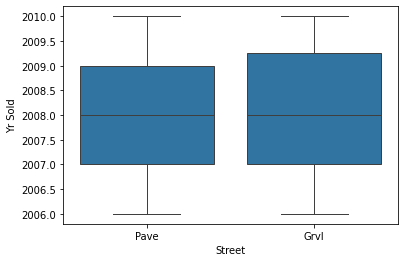

In [18]:
sns.boxplot(data=df,x='Street',y='Yr Sold')#tidak

<Axes: xlabel='Street', ylabel='SalePrice'>

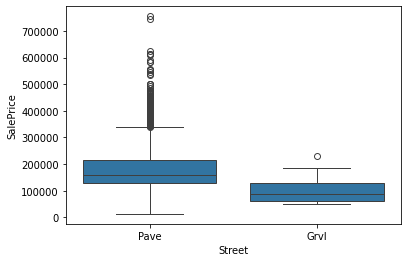

In [19]:
sns.boxplot(data=df,x='Street',y='SalePrice')#iya